## "NLP Classification Analysis."

- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [2]:
import os
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.

### Read in data
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [3]:
# Specify the folder and read in the subfolders.
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data')     
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [4]:
len(my_docs)

2000

In [5]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

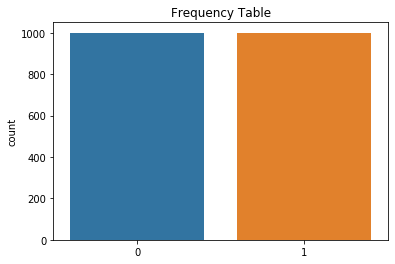

In [6]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

### 1) 데이터 전처리

In [7]:
corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)               # Remove the excess white spaces introduced in the previous steps.
    corpus.append(review)  

In [8]:
# Just show a document.
corpus[0]

'arnold schwarzenegger has been an icon for action enthusiasts since the late 80 but lately his films have been very sloppy and the one liners are getting worse nit hard seeing arnold as mr freeze in batman and robin especially when he says tons of ice jokes but hey he got 15 million what it matter to him nonce again arnold has signed to do another expensive blockbuster that can compare with the likes of the terminator series true lies and even eraser nin this so called dark thriller the devil gabriel byrne has come upon earth to impregnate woman robin tunney which happens every 1000 years and basically destroy the world but apparently god has chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but 

### 2) TF IDF 

In [9]:
TFIDF = TfidfVectorizer(max_features = 1000, min_df = 2, max_df = 0.6, stop_words = stopwords.words('english'))
TFIDF.fit(corpus)                                          # Create a TF IDF model. 
X = TFIDF.transform(corpus).toarray()
X.shape

(2000, 1000)

### 3) Naive Bayes 알고리즘 사용해 예측 분석, 정확도 계산

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [11]:
# Training.
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
# Testing.
Y_pred = NB.predict(X_test)
conf_mat = confusion_matrix(Y_pred, Y_test)
acc = accuracy_score(Y_pred,Y_test)

In [13]:
# The confusion matrix.
print(conf_mat)

[[231  92]
 [ 70 207]]


In [14]:
# The accuracy.
print(np.round(acc,3))

0.73
